In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('HR_comma_sep.csv')

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
left = data.groupby('left')
left.mean()
print(left.count())

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0                  11428            11428           11428   
1                   3571             3571            3571   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0                    11428               11428          11428   
1                     3571                3571           3571   

      promotion_last_5years  Departments   salary  
left                                               
0                     11428         11428   11428  
1                      3571          3571    3571  


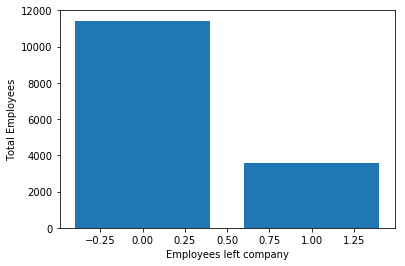

In [8]:
left_count = data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees left company')
plt.ylabel('Total Employees')
plt.show()

In [9]:
print(left_count['satisfaction_level'])

left
0    11428
1     3571
Name: satisfaction_level, dtype: int64


In [10]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

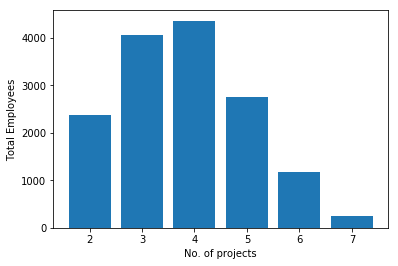

In [11]:
projects = data.groupby('number_project').count()
plt.bar(projects.index.values, projects['satisfaction_level'])
plt.xlabel('No. of projects')
plt.ylabel('Total Employees')
plt.show()

In [12]:
# most of the employees are doing 3-5 projects

In [13]:
print(data.groupby('number_project').count())

                satisfaction_level  last_evaluation  average_montly_hours  \
number_project                                                              
2                             2388             2388                  2388   
3                             4055             4055                  4055   
4                             4365             4365                  4365   
5                             2761             2761                  2761   
6                             1174             1174                  1174   
7                              256              256                   256   

                time_spend_company  Work_accident  left  \
number_project                                            
2                             2388           2388  2388   
3                             4055           4055  4055   
4                             4365           4365  4365   
5                             2761           2761  2761   
6                            

[]

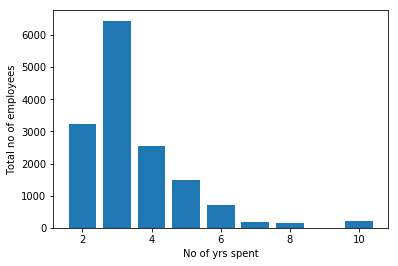

In [14]:
time_spent = data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('No of yrs spent')
plt.ylabel('Total no of employees')
plt.plot()

In [15]:
# most of the employees work for 2-4 yrs. mostly 3

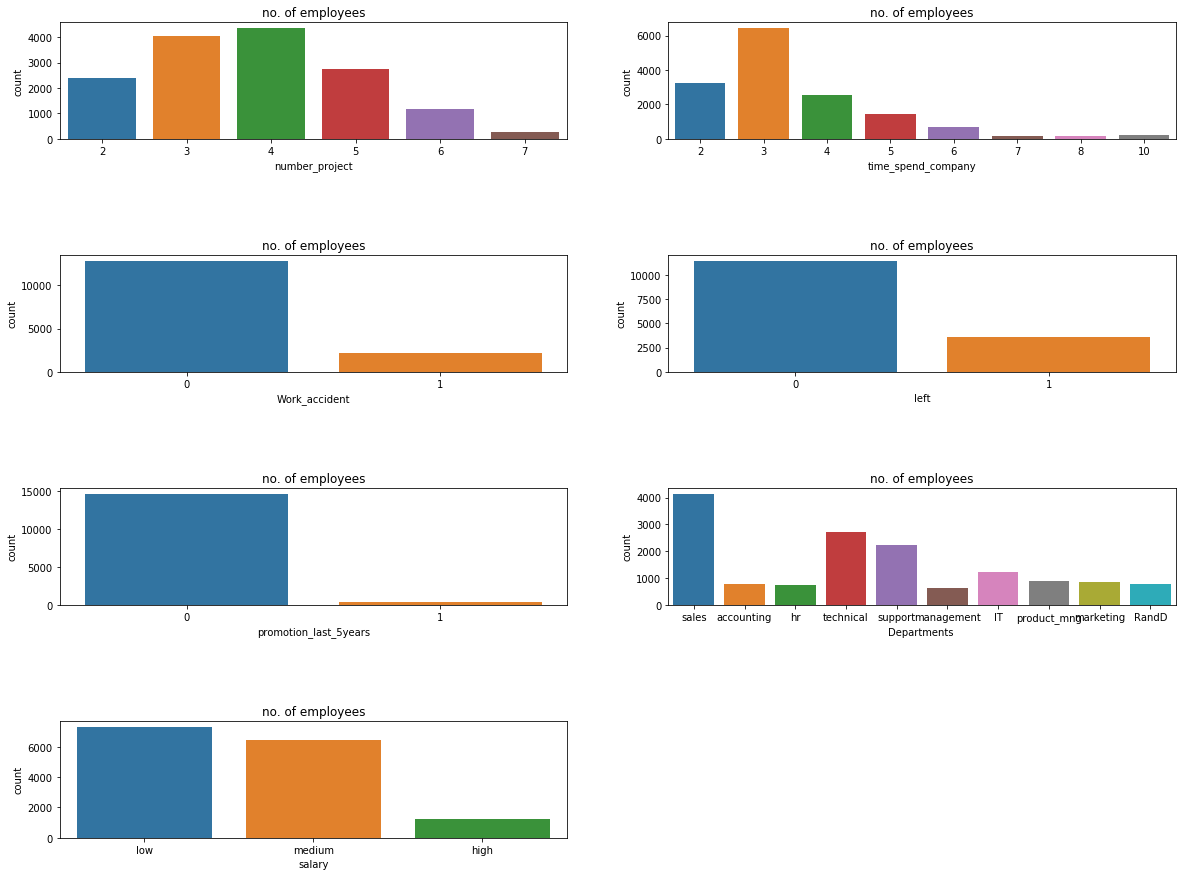

In [16]:
# for plotting all in 1 go, use sub-plot using seaborn library

features = ['number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Departments ', 'salary']
fig = plt.subplots(figsize=(20,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace=1)
    sns.countplot(x=j, data=data)
    plt.title('no. of employees')


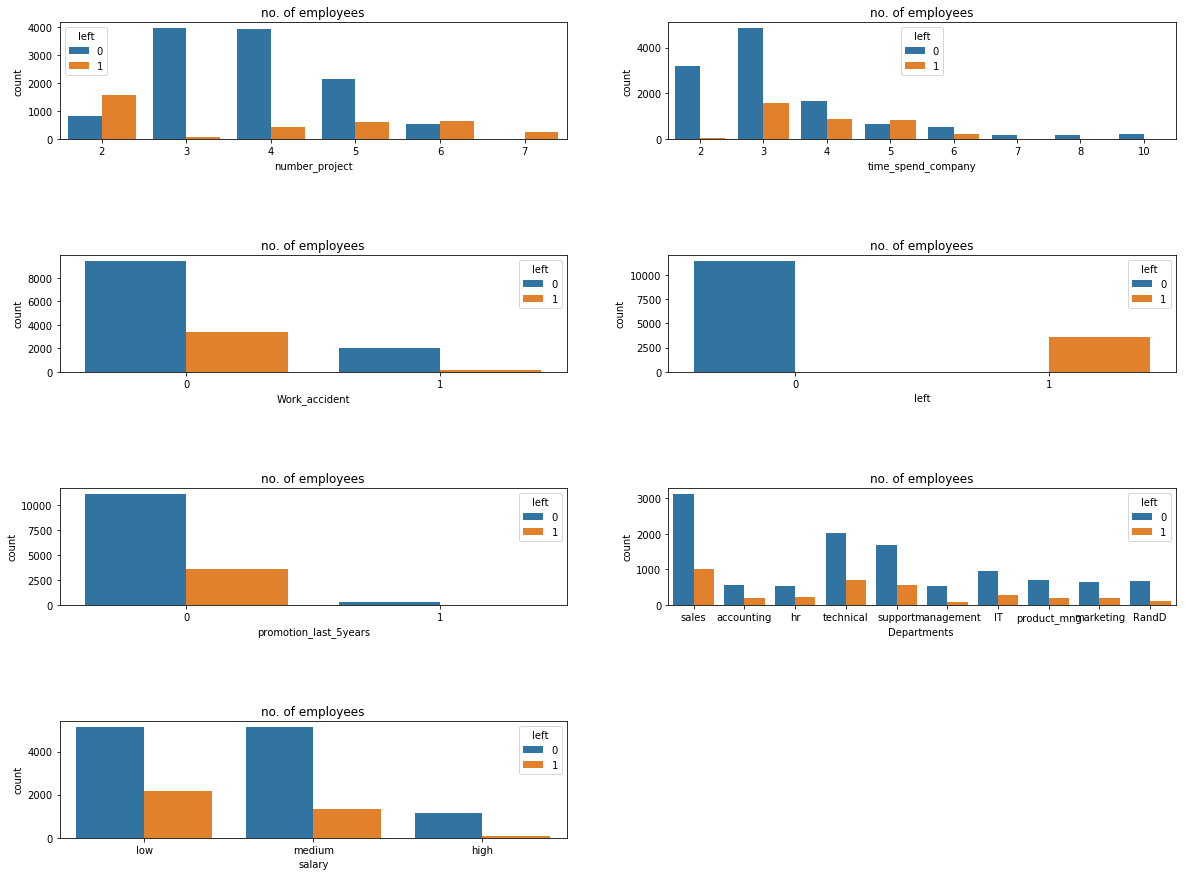

In [17]:
# for plotting all in 1 go, use sub-plot using seaborn library

features = ['number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Departments ', 'salary']
fig = plt.subplots(figsize=(20,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace=1)
    sns.countplot(x=j, data=data, hue='left')
    plt.title('no. of employees')

In [21]:
# now oobserving data using clusters
from sklearn.cluster import KMeans
left_emp = data[['satisfaction_level', 'last_evaluation']][data.left==1]

kmeans = KMeans(n_clusters=3, random_state=0).fit(left_emp)

Text(0.5,1,'3 clusters of employees who exit')

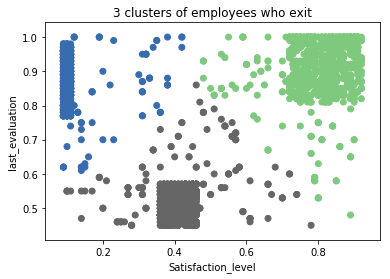

In [26]:
left_emp['label'] = kmeans.labels_
# scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'], cmap='Accent')
plt.xlabel('Satisfaction_level')
plt.ylabel('last_evaluation')
plt.title('3 clusters of employees who exit')

In [27]:
# encoding the categorial values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data['salary'] = le.fit_transform(data['salary'])
data['Departments '] = le.fit_transform(data['Departments '])

In [45]:
# splitting dataset in train and test
X = data[data.columns.difference(['left'])]
y = data['left']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [47]:
# building model using gradientBoosting

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)


In [48]:
# Measuring performance
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))

Accuracy:  0.9771111111111112
Precision:  0.9699029126213592
Recall:  0.9327731092436975


In [51]:
# building model using RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [52]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_rfc))
print('Precision: ', metrics.precision_score(y_test, y_pred_rfc))
print('Recall: ', metrics.recall_score(y_test, y_pred_rfc))

Accuracy:  0.9902222222222222
Precision:  0.9923298178331735
Recall:  0.9663865546218487
